# Topic: Pandas

## Exercise(s): Learn how to use Pandas **


Objective: Learn Pandas

Competencies:
-	Participants will be able to use Pandas

Tools: Python, Anaconda, Jupyter

Analysis case study: -

The *pandas* package is the one of the most important tool at the disposal of Data Scientists today.
The powerful machine learning and beautiful visualization tools may get all the praise, but Pandas is the base of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

This notebook is modified from the Jupyter notebook located at https://github.com/LearnDataSci/article-resources/tree/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners

## What's Pandas for?

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like


    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?


- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before you jump into the modeling or the complex visualizations you need to have a good understanding of the nature of your dataset and pandas is the best avenue through which to do that.



## How does pandas fit into the data science toolkit?

Not only is the pandas library a central component of the data science toolkit but it is used in conjunction with other libraries in that collection. 

Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.

Jupyter Notebooks offer a good environment for using pandas to do data exploration and modeling, but pandas can also be used in text editors just as easily.

Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file. This saves a lot of time when working with large datasets and complex transformations. Notebooks also provide an easy way to visualize pandas’ DataFrames and plots. As a matter of fact, this article was created entirely in a Jupyter Notebook.

## When should you start using pandas?

If you do not have any experience coding in Python, then you should stay away from learning pandas until you do. You don’t have to be at the level of the software engineer, but you should be adept at the basics, such as lists, tuples, dictionaries, functions, and iterations. Also, I’d also recommend familiarizing yourself with **NumPy** due to the similarities mentioned above.



## Pandas First Steps

### Install and import
Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

`conda install pandas`

OR 

`pip install pandas`

Alternatively, if you're currently viewing this article in a Jupyter notebook you can run this cell:, uncomment it to proceed.

In [ ]:
#!pip install pandas or conda install -c anaconda pandas in the terminal

The `!` at the beginning runs cells as if they were in a terminal.

To import pandas we usually import it with a shorter name since it's used so much:

In [ ]:
import pandas as pd

Now to the basic components of pandas.

## Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

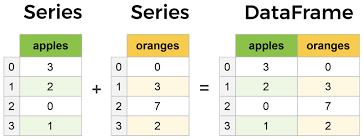

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

### Creating DataFrames from scratch
Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [ ]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

And then pass it to the pandas DataFrame constructor:

In [ ]:
purchases = pd.DataFrame(data)

purchases

**How did that work?**

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [ ]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

So now we could **loc**ate a customer's order by using their name:

In [ ]:
purchases.loc['June']

There's more on locating and extracting data from the DataFrame later, but now you should be able to create a DataFrame with any random data to learn on.

Let's move on to some quick methods for creating DataFrames from various other sources.

## How to read in data

It’s quite simple to load data from various file formats into a DataFrame. In the following examples we'll keep using our apples and oranges data, but this time it's coming from various files.

### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [ ]:
df = pd.read_csv('Pandas_data/purchases.csv')

df

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [ ]:
df = pd.read_csv('Pandas_data/purchases.csv', index_col=0)

df

Here we're setting the index to be column zero.

You'll find that most CSVs won't ever have an index column and so usually you don't have to worry about this step.

### Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [ ]:
df = pd.read_json('Pandas_data/purchases.json')

df

Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. Feel free to open `data_file.json` in a notepad so you can see how it works.

Pandas will try to figure out how to create a DataFrame by analyzing structure of your JSON, and sometimes it doesn't get it right. Often you'll need to set the `orient` keyword argument depending on the structure, so check out [read_json docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) about that argument to see which orientation you're using.

### Reading data from a SQL database

If you’re working with data from a SQL database you need to first establish a connection using an appropriate Python library, then pass a query to pandas. Here we'll use SQLite to demonstrate. 

First, we need `pysqlite3` installed, so run this command in your terminal:

`pip install pysqlite3`

Or run this cell if you're in a notebook:

In [ ]:
#!pip install pysqlite3 or conda install -c blaze sqlite3 in the terminal

`sqlite3` is used to create a connection to a database which we can then use to generate a DataFrame through a `SELECT` query.

So first we'll make a connection to a SQLite database file:

In [ ]:
import sqlite3

con = sqlite3.connect("Pandas_data/database.db")

**Note**: If you have data in PostgreSQL, MySQL, or some other SQL server, you'll need to obtain the right Python library to make a connection. For example, `psycopg2` ([link](http://initd.org/psycopg/download/)) is a commonly used library for making connections to PostgreSQL. Furthermore, you would make a connection to a database URI instead of a file like we did here with SQLite. 


In this SQLite database we have a table called *purchases*, and our index is in a column called "index". 

By passing a SELECT query and our `con`, we can read from the *purchases* table:

In [ ]:
df = pd.read_sql_query("SELECT * FROM purchases", con)

df

Just like with CSVs, we could pass `index_col='index'`, but we can also set an index after-the-fact:

In [ ]:
df = df.set_index('index')

df

In fact, we could use `set_index()` on *any* DataFrame using *any* column at *any* time. Indexing Series and DataFrames is a very common task, and the different ways of doing it is worth remembering.

### Converting back to a CSV, JSON, or SQL

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [ ]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

df.to_sql('new_purchases_100', con)

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. With SQL, we’re not creating a new file but instead inserting a new table into the database using our `con` variable from before.

Let's move on to importing some real-world data and detailing a few of the operations you'll be using a lot.


## Most important DataFrame operations

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin:

In [ ]:
movies_df = pd.read_csv("Pandas_data/IMDB-Movie-Data.csv", index_col="Title")

We're loading this dataset from a CSV and designating the movie titles to be our index.

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [ ]:
movies_df.head()

`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [ ]:
movies_df.tail(2)

Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

You'll notice that the index in our DataFrame is the *Title* column, which you can tell by how the word *Title* is slightly lower than the rest of the columns.

### Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [ ]:
movies_df.info()

`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

Seeing the datatype quickly is actually quite useful. Imagine you just imported some JSON and the integers were recorded as strings. You go to do some arithmetic and find an "unsupported operand" Exception because you can't do math with strings. Calling `.info()` will quickly point out that your column you thought was all integers are actually string objects.

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns):

In [ ]:
movies_df.shape

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

You'll be going to `.shape` a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

### Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [ ]:
temp_df = movies_df.append(movies_df)

temp_df.shape

Using `append()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp` so we aren't working with the real data.

Notice call `.shape` quickly proves our DataFrame rows have doubled.

Now we can try dropping duplicates:

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [ ]:
temp_df.drop_duplicates(inplace=True)

Now our `temp_df` *will* have the transformed data automatically. 

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Using `last` has the opposite effect: the first row is dropped.

`keep`, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Watch what happens to `temp_df`:

In [ ]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [ ]:
movies_df.columns

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [ ]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [ ]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [ ]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

### How to work with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [ ]:
movies_df.isnull()

Notice `isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing: 

In [ ]:
movies_df.isnull().sum()

`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has **128** missing values for `revenue_millions` and **64** missing values for `metascore`.

#### Removing null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [ ]:
movies_df.dropna()

This operation will delete any **row** with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify `inplace=True` in this method as well.

So in the case of our dataset, this operation would remove 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

Other than just dropping rows, you can also drop columns with null values by setting `axis=1`:

In [ ]:
movies_df.dropna(axis=1)

In our dataset, this operation would drop the `revenue_millions` and `metascore` columns.

**Intuition side note**: What's with this `axis=1` parameter?

It's not immediately obvious where `axis` comes from and why you need it to be 1 for it to affect columns. To see why, just look at the `.shape` output:

In [ ]:
movies_df.shape

As we learned above, this is a tuple that represents the shape of the DataFrame, i.e. 1000 rows and 11 columns. Note that the *rows* are at index zero of this tuple and *columns* are at **index one** of this tuple. This is why `axis=1` affects columns. This comes from NumPy, and is a great example of why learning NumPy is worth your time.

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. 

There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:

In [ ]:
revenue = movies_df['revenue_millions']

Using square brackets is the general way we select columns in a DataFrame. 

If you remember back to when we created DataFrames from scratch, the keys of the `dict` ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary. 

`revenue` now contains a Series:

In [ ]:
revenue.head()

Slightly different formatting than a DataFrame, but we still have our `Title` index. 

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [ ]:
revenue_mean = revenue.mean()

revenue_mean

With the mean, let's fill the nulls using `fillna()`:

In [ ]:
revenue.fillna(revenue_mean, inplace=True)

We have now replaced all nulls in `revenue` with the mean of the column. Notice that by using `inplace=True` we have actually affected the original `movies_df`:

In [ ]:
movies_df.isnull().sum()

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by Genre or Director. 

For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

Let's now look at more ways to examine and understand the dataset.

### Understanding your variables

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [ ]:
movies_df.describe()

Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually. 

`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [ ]:
movies_df['genre'].describe()

This tells us that the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell us the frequency of all values in a column:

In [ ]:
movies_df['genre'].value_counts().head(10)

#### Relationships between continuous variables

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [ ]:
movies_df.corr()

Correlation tables are a numerical representation of the bivariate relationships in the dataset. 

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation. 

So looking in the first row, first column we see `rank` has a perfect correlation with itself, which is obvious. On the other hand, the correlation between `votes` and `revenue_millions` is 0.6. A little more interesting.

Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots (seen below in the plotting section). 

For a deeper look into data summarizations check out [Essential Statistics for Data Science](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/).

Let's now look more at manipulating DataFrames.

### DataFrame slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors. 

Let's look at working with columns first.

#### By column

You already saw how to extract a column using square brackets like this:

In [ ]:
genre_col = movies_df['genre']

print(type(genre_col))
print()
print(genre_col)

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names. In our case that's just a single column:

In [ ]:
# Series is like a column in a table, example:
example_list = [1, 7, 2]

example_series = pd.Series(example_list)

print(example_series)


In [ ]:
genre_col = movies_df[['genre']]

print(type(genre_col))
print()
print(genre_col)

Since it's just a list, adding another column name is easy:

In [ ]:
subset = movies_df[['genre', 'rating']]

subset.head()

Now we'll look at getting data by rows.

#### By rows

For rows, we have two options: 

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Remember that we are still indexed by movie Title, so to use `.loc` we give it the Title of a movie:

In [ ]:
prom = movies_df.loc["Prometheus"]

print(type(prom))

print(prom)

On the other hand, with `iloc` we give it the numerical index of Prometheus:

In [ ]:
prom = movies_df.iloc[1]

`loc` and `iloc` can be thought of as similar to Python `list` slicing. To show this even further, let's select multiple rows.

How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [ ]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

One important distinction between using `.loc` and `.iloc` to select multiple rows is that `.loc` includes the movie *Sing* in the result, but when using `.iloc` we're getting rows 1:4 but the movie at index 4 (*Suicide Squad*) is not included. 

Slicing with `.iloc` follows the same rules as slicing with lists, the object at the index at the end is not included.

#### Conditional selections
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [ ]:
condition = (movies_df['director'] == "Ridley Scott")

condition.head()

Similar to `isnull()`, this returns a Series of True and False values: True for films directed by Ridley Scott and False for ones not directed by him. 

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [ ]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

You can get used to looking at these conditionals by reading it like: 

> Select movies_df where movies_df director equals Ridley Scott

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:

In [ ]:
movies_df[movies_df['rating'] >= 8.6].head(3)

We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [ ]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

Using the `isin()` method we could make this more concise though:

In [ ]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

Here's how we could do all of that:

In [ ]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

If you recall up when we used `.describe()` the 25th percentile for revenue was about 17.4, and we can access this value directly by using the `quantile()` method with a float of 0.25.

So here we have only four movies that match that criteria.

In [ ]:
# Exercise: let's retrieve movies that were released after 2010, and have rating above 7 




## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [ ]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [ ]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

The `.apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. This Series is then assigned to a new column called `rating_category`.

You can also use anonymous functions as well. This lambda function achieves the same result as `rating_function`:

In [ ]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

> Vectorization: a style of computer programming where operations are applied to whole arrays instead of individual elements —[Wikipedia](https://en.wikipedia.org/wiki/Vectorization)

A good example of high usage of `apply()` is during natural language processing (NLP) work. You'll need to apply all sorts of text cleaning functions to strings to prepare for machine learning.

In [ ]:
# Exercise: create a metascore_category and set it to "Good" if above 70, "Bad" if 70 and below 




## Brief Plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib (`pip install matplotlib`):

In [ ]:
import matplotlib.pyplot as plt

# setup the runtime configuration (rc) parameters
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore you're data easily.

**Side note:**
For categorical variables utilize Bar Charts* and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

In [ ]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a syntax error, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebooks.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

In [ ]:
movies_df['rating'].plot(kind='hist', title='Rating');

Do you remember the `.describe()` example at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [ ]:
# Exercise: Create a histogram for 'Votes' column



In [ ]:
movies_df['rating'].describe()

Using a Boxplot we can visualize this data:

In [ ]:
movies_df['rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

In [ ]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

That's the general idea of plotting with pandas. There's too many plots to mention, so definitely take a look at the `plot()` [docs here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more information on what it can do.

## Wrapping up

Exploring, cleaning, transforming, and visualization data with pandas in Python is an essential skill in data science. Just cleaning wrangling data is 80% of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.

To keep improving, view the [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) offered by the official pandas docs, follow along with a few [Kaggle kernels](https://www.kaggle.com/kernels), and keep working on your own projects!